In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from scipy.io import readsav
import glob
from astropy.io import fits


In [2]:
sav_files = glob.glob('*v2.sav')

In [3]:
data = readsav(sav_files[0])
galname = 'FGC'+sav_files[0].split('final')[0]

In [4]:
data.keys()

dict_keys(['ca_off_rw', 'ca_off_vel', 'ca_off_vel_err', 'ca_mid_rw', 'ca_mid_vel', 'ca_mid_vel_err', 'ha_mid_rw', 'ha_mid_vel', 'ha_mid_vel_err', 'ha_off_rw', 'ha_off_vel', 'ha_off_vel_err', 'sigmid_rw', 'ca_mid_losvd', 'ca_mid_losvd_err', 'sigoff_rw', 'ca_off_losvd', 'ca_off_losvd_err', 'mid_y', 'mid_wei', 'mid_ranges', 'off_y', 'off_wei', 'off_ranges'])

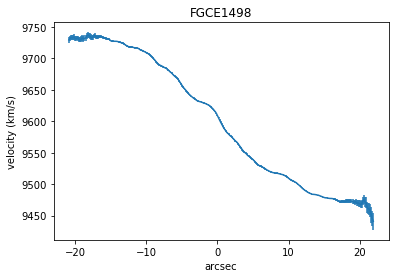

In [5]:
fig, ax = plt.subplots()
ax.errorbar(data['ha_mid_rw'], data['ha_mid_vel'], yerr=data['ha_mid_vel_err'])
ax.set_title(galname)
ax.set_xlabel('arcsec')
ax.set_ylabel('velocity (km/s)')

In [6]:
def data2fits(data, galname):
    hdr = fits.Header()
    hdr['COMMENT'] = "from https://ui.adsabs.harvard.edu/abs/2008ApJ...682.1004Y/abstract"
    hdr['galName'] = galname
    hdr['HA_vel'] = 'km/s'
    hdr['Distance'] = 'arcseconds'
    hdr['HA_vel_err'] = 'km/s'
    
    # XXX add units
    
    primary_hdu = fits.PrimaryHDU(header=hdr) 
    col1 = fits.Column(name='H-alpha_velocity', format='Fw.d', array=data['ha_mid_vel'])
    col2 = fits.Column(name='Distance', format='Fw.d', array=data['ha_mid_rw'])
    col3 = fits.Column(name='H-alpha_velocity_err', format='Fw.d', array=data['ha_mid_vel_err'])

    cols = fits.ColDefs([col1, col2, col3])
    hdu = fits.TableHDU.from_columns(cols)
    
    hdul = fits.HDUList([primary_hdu, hdu])
    hdul.writeto(galname+'.fits')
    

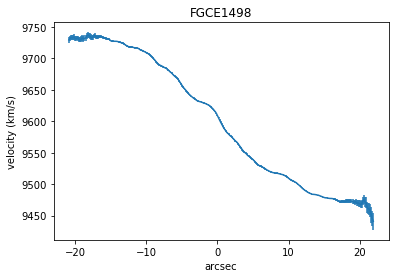

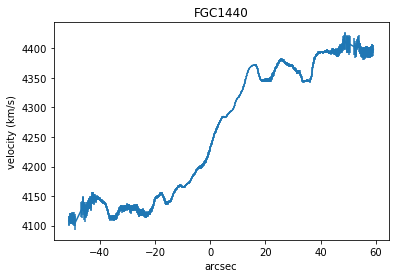

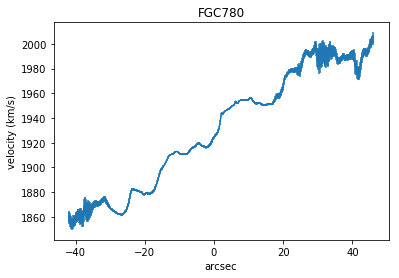

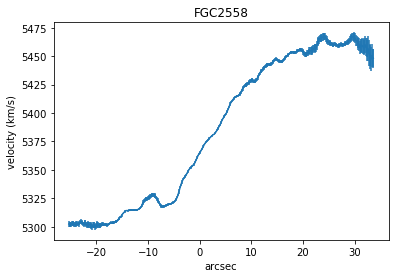

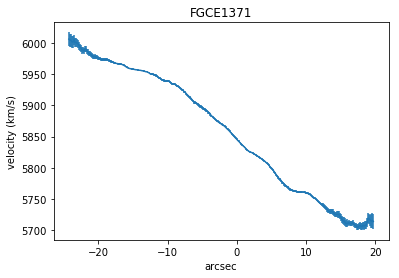

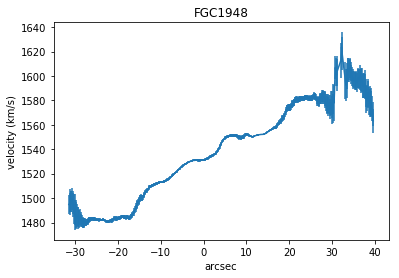

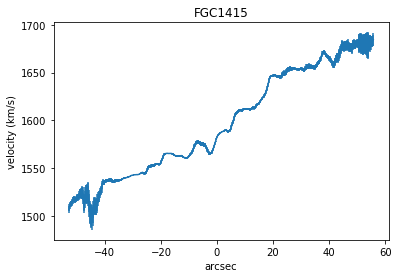

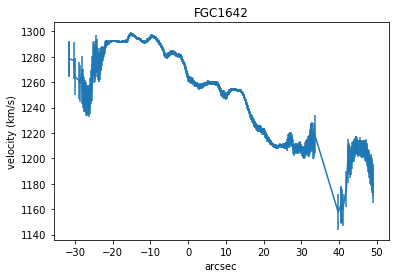

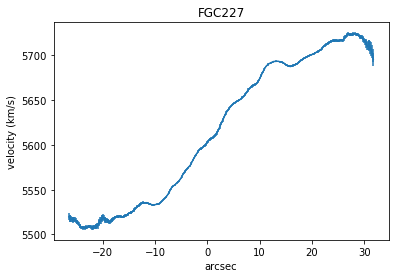

In [7]:
for filename in sav_files:
    data = readsav(filename)
    galname = 'FGC'+filename.split('final')[0]
    fig, ax = plt.subplots()
    ax.errorbar(data['ha_mid_rw'], data['ha_mid_vel'], yerr=data['ha_mid_vel_err'])
    ax.set_title(galname)
    ax.set_xlabel('arcsec')
    ax.set_ylabel('velocity (km/s)')
    
    data2fits(data, galname)